<a href="https://colab.research.google.com/github/KimJisanER/KimJisan_TS/blob/main/_5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_Data_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [56]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [57]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

In [58]:
data, info =tfds.load('mnist', with_info=True)
train_data, test_data = data['train'], data['test']

In [59]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [60]:
import numpy as np

In [61]:
num_items = 20
num_list = np.arange(num_items)

In [62]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [63]:
num_list_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [64]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [65]:
import itertools

def gen():
  for i in itertools.count(1):
    yield(i,[1]*i)

dataset = tf.data.Dataset.from_generator(
    gen,
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [66]:
def gen(stop):
  for i in itertools.count(1):
    if i < stop:
      yield(i, [1]*i)

dataset = tf.data.Dataset.from_generator(
    gen, args=[10],
    output_types=(tf.int64, tf.int64),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([None]))
)
list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [67]:
dataset = num_list_dataset.repeat(3).batch(7)

In [68]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [69]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [70]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [71]:
from tensorflow.data import Dataset

In [72]:
dataset = Dataset.range(1,6)
dataset = dataset.map(lambda x: x*2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [73]:
dataset = Dataset.range(5)
result = dataset.map(lambda x: x + 1)
result

<MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [74]:
elements = [(1,'one'),(2,'two'), (3,'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result =dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [75]:
dataset = Dataset.range(3)

def g(x):
  return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

  reslut = dataset.map(g)
  result.element_spec 

In [76]:
def h(x):
  return 10.5, ["One", "Two", "Three"], np.array([1.0, 2.0], dtype=np.float64)

result =dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [77]:
def i(x):
  return (10.5, [12.5, 11.1]), "One","Two" 

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.float32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [78]:
dataset = Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9,10])
dataset = dataset.filter(lambda x: x < 3)
list(dataset.as_numpy_iterator())

[1, 2]

In [79]:
def filter_fn(x):
  return tf.math.equal(x,1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [80]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [81]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
  print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'During a sleepless night, I was switching through the channels & found this embarrassment of a movie. What were they thinking?<br /><br />If this is life after "Remote Control" for Kari (Wuhrer) Salin, no wonder she\'s gone nowhere.<br /><br />And why did David Keith take this role? It\'s pathetic!<br /><br />Anyway, I turned on the movie near the end, so I didn\'t get much of the plot. But this must\'ve been the best part. This nerdy college kid brings home this dominatrix-ish girl...this scene is straight out of the comic books -- or the cheap porn movies. She calls the mother anal retentive and kisses the father "Oh, I didn\'t expect tongue!" Great lines!<br /><br />After this, I had to see how it ended..<br /><br />Well, of course, this bitch from hell has a helluva past, so the SWAT team is upstairs. And yes...they surround her! And YES YES! The kid blows her brains out!!!! AHAHHAHAHAHA!!<br /><br />This is must-see TV. <br />

### get_next()

In [82]:
dataset = Dataset.range(2)
for element in dataset:
  print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [83]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [84]:
a = np.random.randint(0, 10, size =(2,3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())

[[2 1 8]
 [1 9 5]]
tf.Tensor([2 1 8], shape=(3,), dtype=int64)
tf.Tensor([1 9 5], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [85]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.data import Dataset
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [86]:
(x_train, y_train),(x_test, y_test) = load_data()

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [88]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [89]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))

train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [90]:
class_names=['T-shirt/top', 'Trouser',' Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag' ,'Ankle boot']

### 데이터 확인

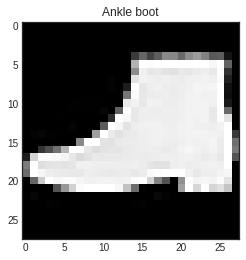

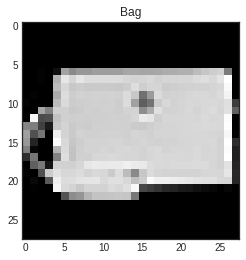

In [91]:
for image, label in train_ds.take(2):
  plt.title("{}".format(class_names[label[0]]))
  plt.imshow(image[0, : ,:], cmap='gray')
  plt.show()

### 모델 생성
- 임의의 모델

In [92]:
def build_model():
  input = Input(shape=(28,28), name='input')
  flatten = Flatten(input_shape=[28,28], name='flatten')(input)
  
  hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)

  hidden2 = Dense(100, kernel_initializer='he_normal', name='hidden2')(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)

  hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)

  hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)

  output = Dense(10, activation= 'softmax', name = 'output')(dropout4)

  model = Model(inputs=[input], outputs=output)

  return model


In [93]:
model = build_model()

In [94]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                           

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [95]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [96]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [97]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
   predictions = model(images)
   loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [98]:
@tf.function

def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [99]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)
  
  template = "Epochs: {:3d}\tLoss: {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}\t"
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epochs:   1	Loss: 0.4956	Accuracy: 82.0550	Test Loss: 0.4568	Test Accuracy: 83.1900	
Epochs:   2	Loss: 0.4320	Accuracy: 84.2517	Test Loss: 0.4243	Test Accuracy: 84.6800	
Epochs:   3	Loss: 0.4003	Accuracy: 85.3694	Test Loss: 0.4023	Test Accuracy: 85.5267	
Epochs:   4	Loss: 0.3778	Accuracy: 86.1546	Test Loss: 0.3896	Test Accuracy: 85.9900	
Epochs:   5	Loss: 0.3608	Accuracy: 86.7467	Test Loss: 0.3808	Test Accuracy: 86.2500	
Epochs:   6	Loss: 0.3467	Accuracy: 87.2364	Test Loss: 0.3748	Test Accuracy: 86.4783	
Epochs:   7	Loss: 0.3353	Accuracy: 87.6200	Test Loss: 0.3707	Test Accuracy: 86.6243	
Epochs:   8	Loss: 0.3250	Accuracy: 87.9927	Test Loss: 0.3677	Test Accuracy: 86.7975	
Epochs:   9	Loss: 0.3161	Accuracy: 88.3163	Test Loss: 0.3641	Test Accuracy: 86.9433	
Epochs:  10	Loss: 0.3077	Accuracy: 88.6118	Test Loss: 0.3645	Test Accuracy: 87.0230	
Epochs:  11	Loss: 0.3005	Accuracy: 88.8694	Test Loss: 0.3622	Test Accuracy: 87.1318	
Epochs:  12	Loss: 0.2937	Accuracy: 89.1119	Test Loss: 0.3627	Test

### 모델 학습 : 2번째 방법 (Keras)

In [100]:
from sklearn.model_selection import train_test_split

In [159]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=777)

x_train = x_train /255.
x_val = x_val/255.
x_test = x_test/255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

model = build_model()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dropout_16 (Dropout)        (None, 256)          

5~6분 소요

In [145]:
from tensorflow.keras.callbacks import EarlyStopping

In [146]:
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=200,
                    shuffle=True,
                    validation_data=(x_val, y_val))

Epoch 1/200
165/165 [==============================] - 3s 17ms/step - loss: 0.5650 - accuracy: 0.8157 - val_loss: 0.4028 - val_accuracy: 0.8640
Epoch 2/200
165/165 [==============================] - 3s 16ms/step - loss: 0.5566 - accuracy: 0.8182 - val_loss: 0.4032 - val_accuracy: 0.8633
Epoch 3/200
165/165 [==============================] - 3s 16ms/step - loss: 0.5684 - accuracy: 0.8154 - val_loss: 0.4040 - val_accuracy: 0.8632
Epoch 4/200
165/165 [==============================] - 3s 16ms/step - loss: 0.5560 - accuracy: 0.8204 - val_loss: 0.4035 - val_accuracy: 0.8623
Epoch 5/200
165/165 [==============================] - 3s 16ms/step - loss: 0.5609 - accuracy: 0.8158 - val_loss: 0.4024 - val_accuracy: 0.8638
Epoch 6/200
165/165 [==============================] - 3s 16ms/step - loss: 0.5549 - accuracy: 0.8177 - val_loss: 0.4029 - val_accuracy: 0.8640
Epoch 7/200
165/165 [==============================] - 3s 16ms/step - loss: 0.5565 - accuracy: 0.8174 - val_loss: 0.4002 - val_accuracy:

In [147]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 평가

In [148]:
model.evaluate(x_test, y_test, batch_size=100)

100/100 [==============================] - 0s 5ms/step - loss: 4.2918 - accuracy: 0.1000


[4.291759967803955, 0.10000000149011612]

### 결과 확인

In [160]:
test_img = x_test[0, :, :]
print(test_img.shape)

(28, 28)


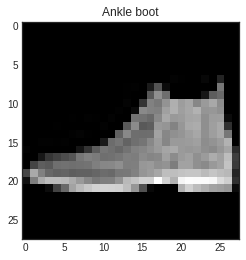

In [161]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap='gray')
plt.show()

In [162]:
pred = model.predict(test_img.reshape(1,28,28))

In [163]:
pred.shape

(1, 10)

In [164]:
pred

array([[0.06398062, 0.1684449 , 0.06026201, 0.0635703 , 0.14015754,
        0.0869423 , 0.06548354, 0.08069204, 0.06897833, 0.20148835]],
      dtype=float32)

In [165]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [166]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [167]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [171]:
preds_arg = np.argmax(preds, -1)

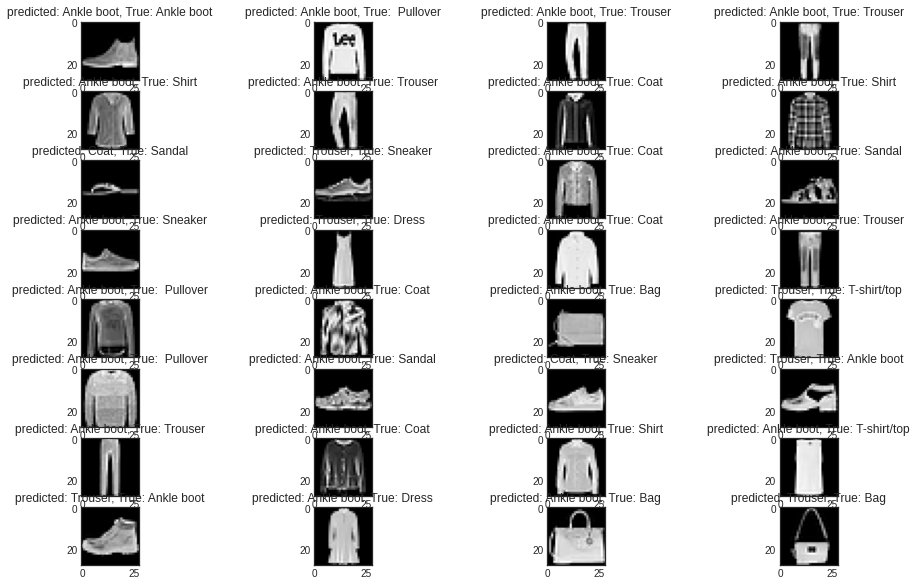

In [172]:
num_rows = 8
num_cols =4
num_images = num_rows*num_cols

plt.figure(figsize=(16,10))

for idx in range(1,33,1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title("predicted: {}, True: {}".format(class_names[preds_arg[idx-1]],
                                             class_names[test_batch_y[idx-1]]))
  plt.imshow(test_batch[idx-1], cmap='gray')

plt.show()